In [1]:
import numpy as np
import scipy.signal
from scipy.optimize import minimize
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
shift_03_21_2020 = path_assistant.PathAssistant('shift_03_21_2020')
waveforms_dir = shift_03_21_2020.get_waveforms_dir()
results_dir = shift_03_21_2020.get_results_dir()

In [2]:
t1 = datetime(2020, 3, 21, 12, 45, 0)
t2 = datetime(2020, 3, 21, 13, 20, 0)

There are 13 files in this data set.
Started working on the file  RefCurve_2020-03-21_0_124604.Wfm.bin (1/13)
period = 3332.4478


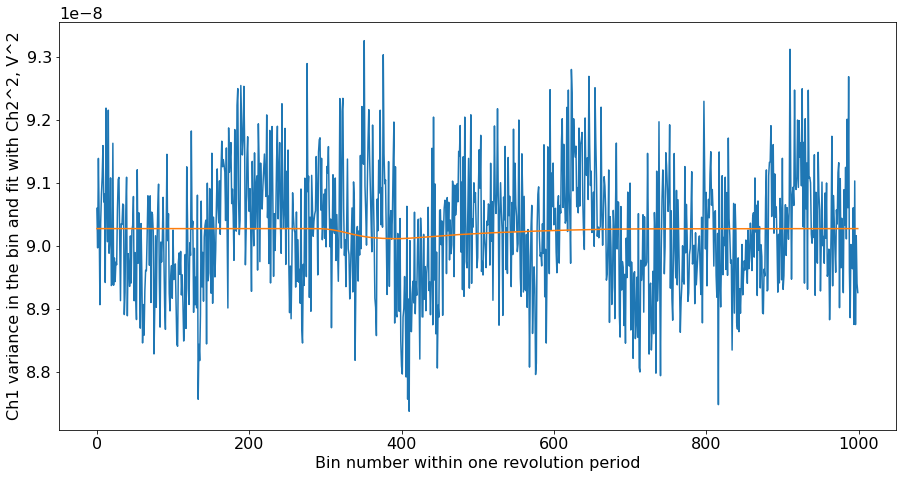

Sum amplitude = 0.00702 V
Finished working on  RefCurve_2020-03-21_0_124604.Wfm.bin (1/13)
Started working on the file  RefCurve_2020-03-21_0_131842.Wfm.bin (2/13)
period = 3332.4478


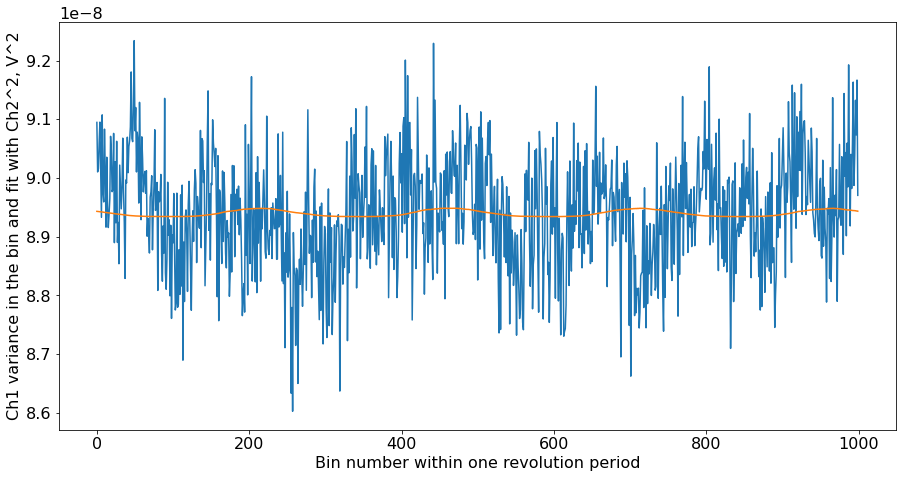

Sum amplitude = 0.00046 V
Finished working on  RefCurve_2020-03-21_0_131842.Wfm.bin (2/13)
Started working on the file  RefCurve_2020-03-21_10_131143.Wfm.bin (3/13)
period = 3332.4478


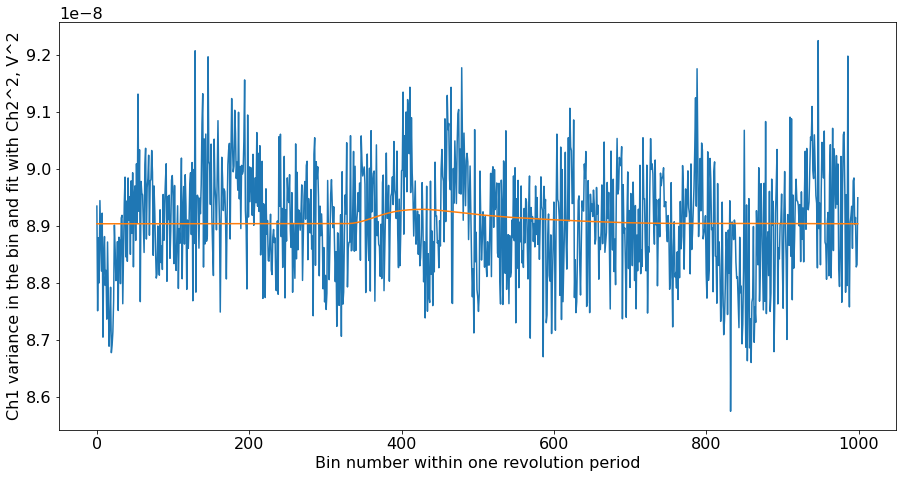

Sum amplitude = 0.00678 V
Finished working on  RefCurve_2020-03-21_10_131143.Wfm.bin (3/13)
Started working on the file  RefCurve_2020-03-21_1_124702.Wfm.bin (4/13)
period = 3332.4478


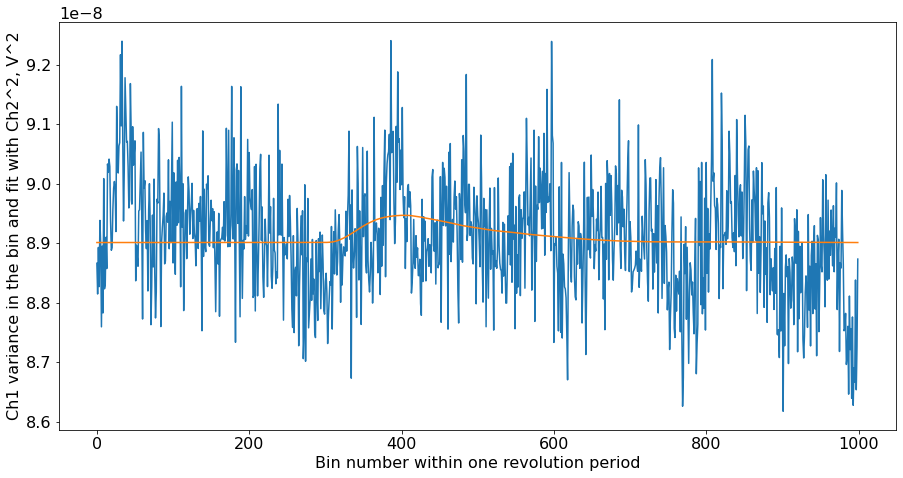

Sum amplitude = 0.00665 V
Finished working on  RefCurve_2020-03-21_1_124702.Wfm.bin (4/13)
Started working on the file  RefCurve_2020-03-21_1_131912.Wfm.bin (5/13)
period = 3332.4478


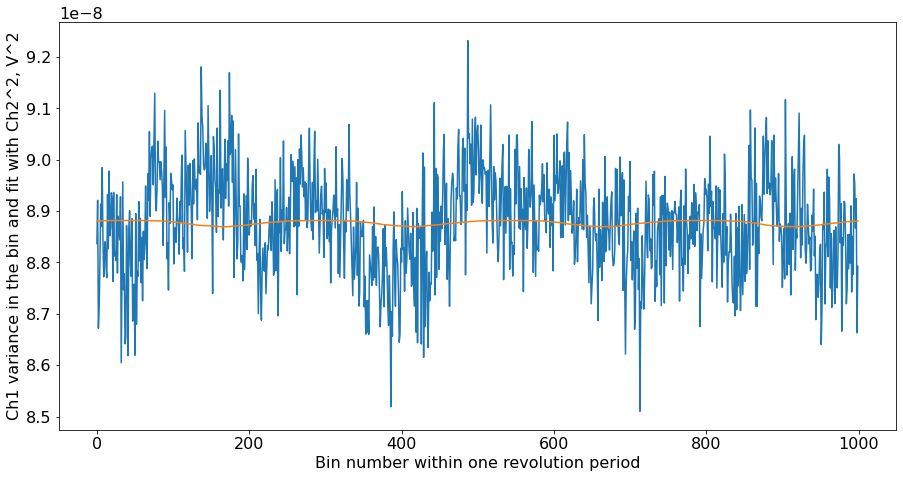

Sum amplitude = 0.000456 V
Finished working on  RefCurve_2020-03-21_1_131912.Wfm.bin (5/13)
Started working on the file  RefCurve_2020-03-21_2_124740.Wfm.bin (6/13)
period = 3332.4478


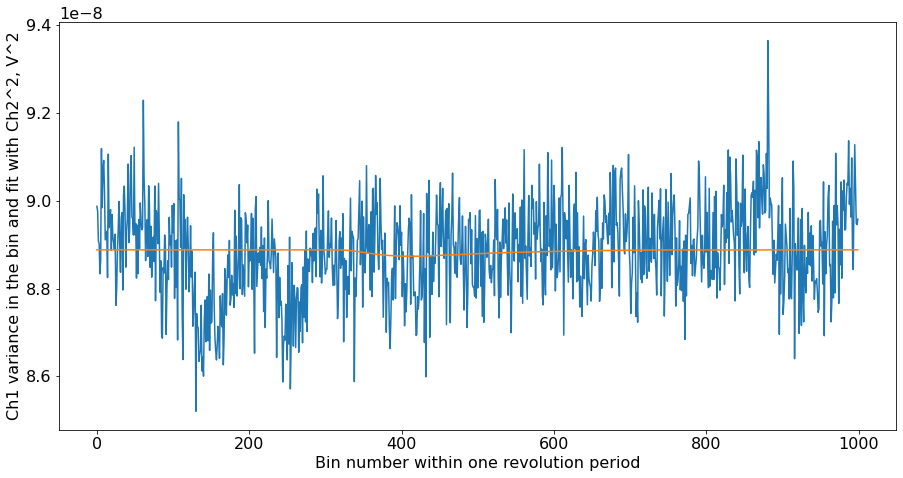

Sum amplitude = 0.00642 V
Finished working on  RefCurve_2020-03-21_2_124740.Wfm.bin (6/13)
Started working on the file  RefCurve_2020-03-21_3_124818.Wfm.bin (7/13)
period = 3332.4478


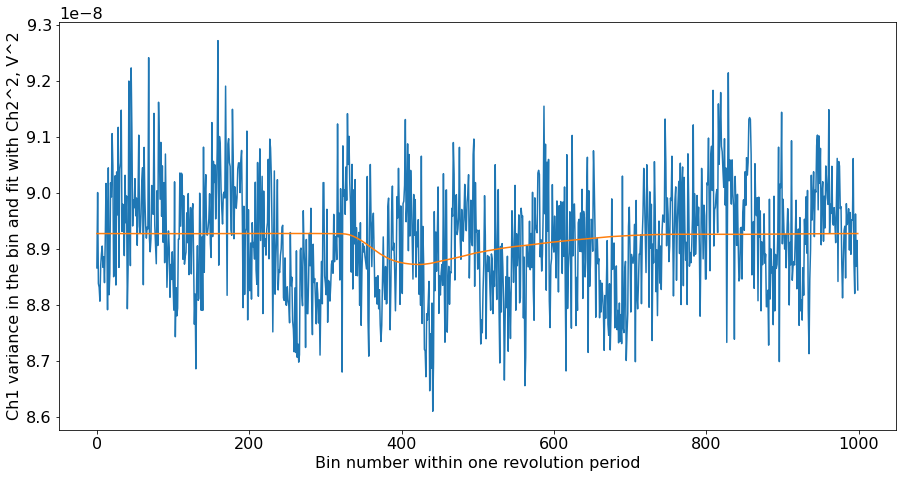

Sum amplitude = 0.00599 V
Finished working on  RefCurve_2020-03-21_3_124818.Wfm.bin (7/13)
Started working on the file  RefCurve_2020-03-21_4_124930.Wfm.bin (8/13)
period = 3332.4478


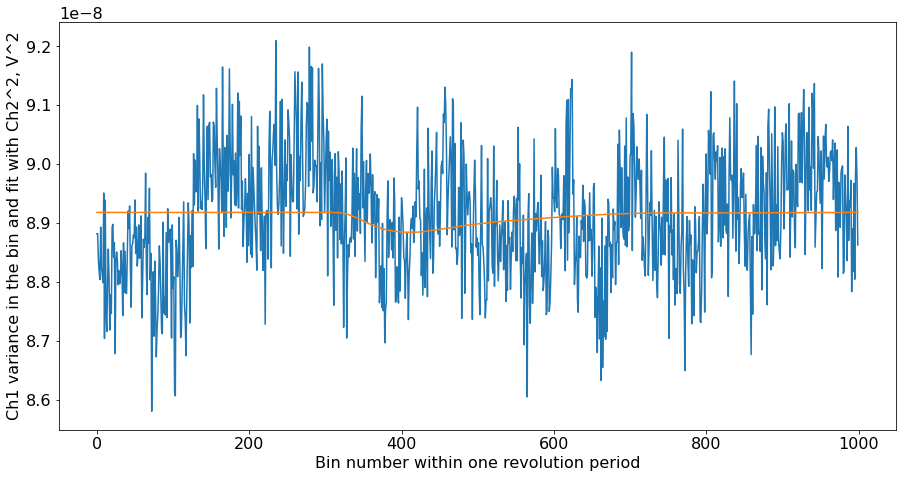

Sum amplitude = 0.00563 V
Finished working on  RefCurve_2020-03-21_4_124930.Wfm.bin (8/13)
Started working on the file  RefCurve_2020-03-21_5_124955.Wfm.bin (9/13)
period = 3332.4478


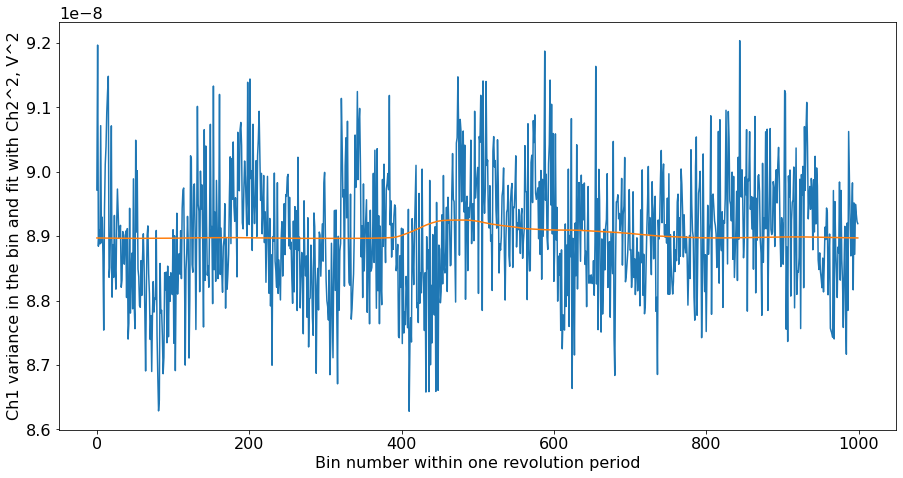

Sum amplitude = 0.00224 V
Finished working on  RefCurve_2020-03-21_5_124955.Wfm.bin (9/13)
Started working on the file  RefCurve_2020-03-21_6_125443.Wfm.bin (10/13)
period = 3332.4478


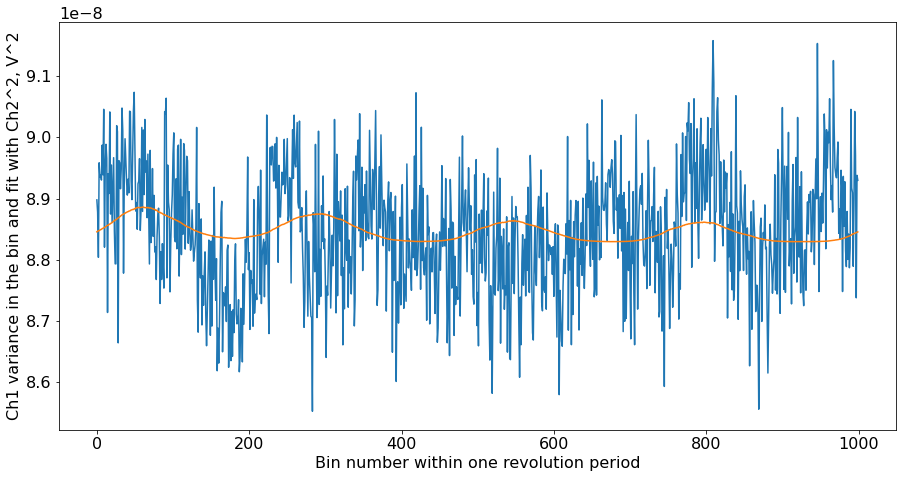

Sum amplitude = 0.000609 V
Finished working on  RefCurve_2020-03-21_6_125443.Wfm.bin (10/13)
Started working on the file  RefCurve_2020-03-21_7_125544.Wfm.bin (11/13)
period = 3332.4478


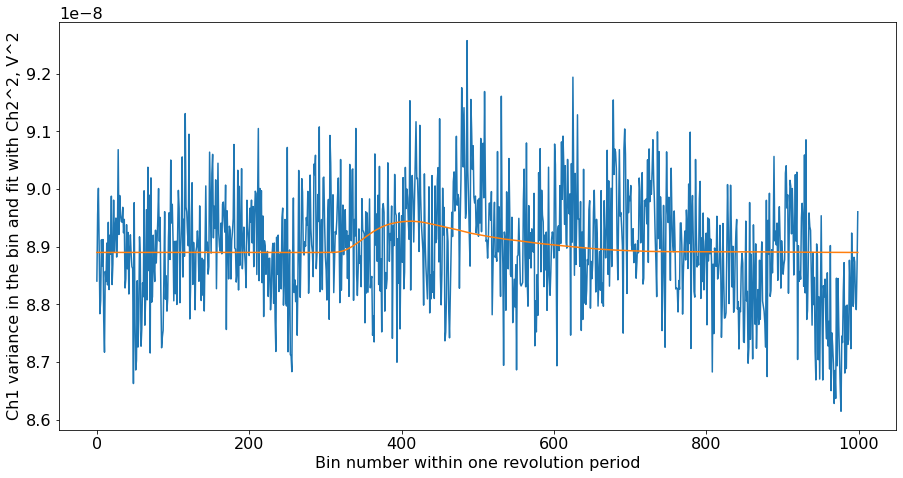

Sum amplitude = 0.00688 V
Finished working on  RefCurve_2020-03-21_7_125544.Wfm.bin (11/13)
Started working on the file  RefCurve_2020-03-21_8_130136.Wfm.bin (12/13)
period = 3332.4478


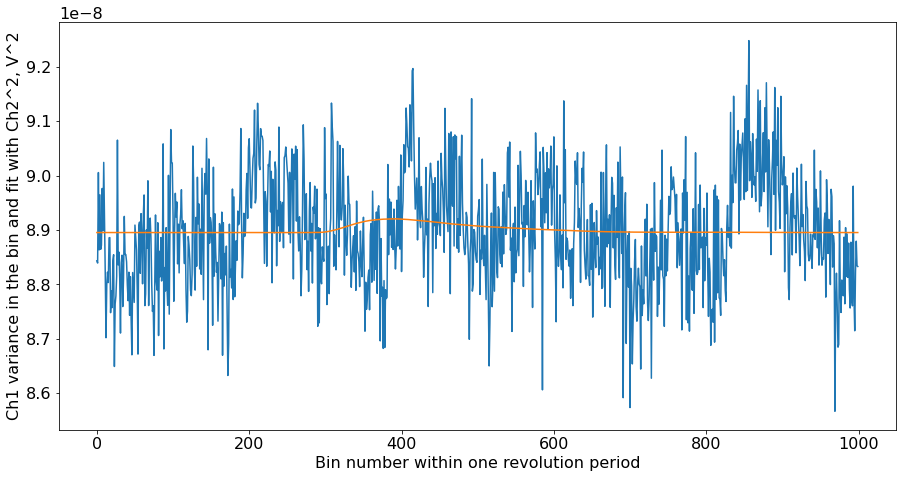

Sum amplitude = 0.00708 V
Finished working on  RefCurve_2020-03-21_8_130136.Wfm.bin (12/13)
Started working on the file  RefCurve_2020-03-21_9_130748.Wfm.bin (13/13)
period = 3332.4478


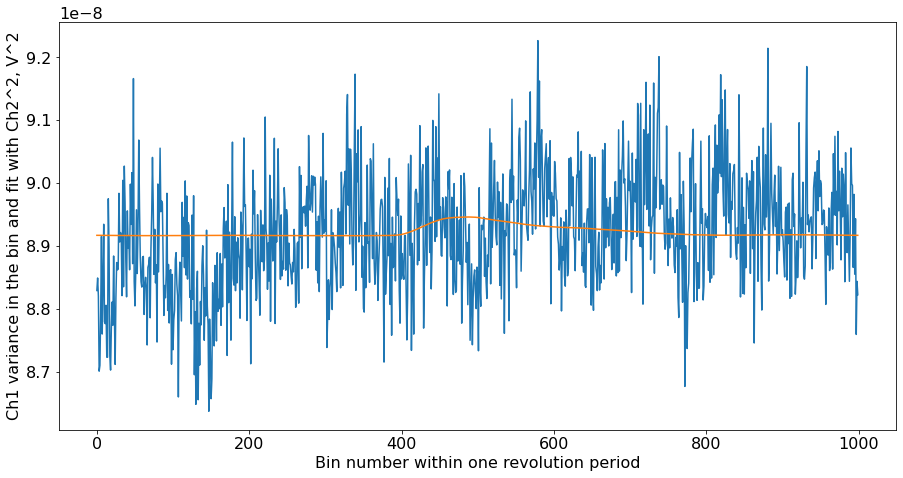

Sum amplitude = 0.00321 V
Finished working on  RefCurve_2020-03-21_9_130748.Wfm.bin (13/13)
Results saved to /mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_21_2020/results/res_df_noise_03_21_2020.csv


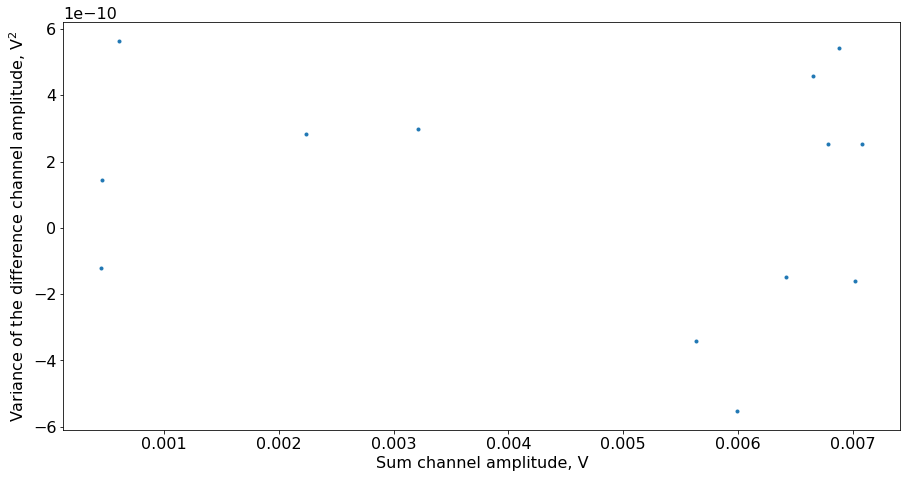

In [3]:
base_name = "noise_03_21_2020"
res_df = analyze_one_dataset(
    shift_03_21_2020,
    base_name,
    t1,
    t2,
    period_in=3332.4478)